## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

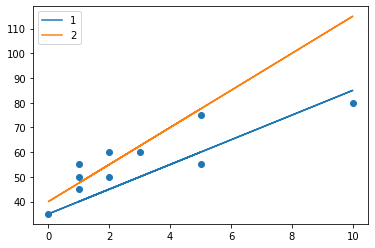

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

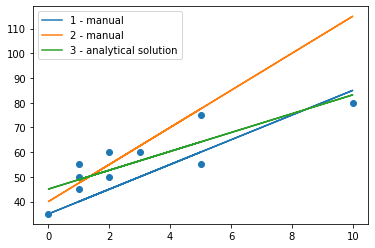

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [23]:
n = X.shape[1]
alpha = 0.1
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

plt_x = []
plt_y = []

for i in range(120):
    
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    plt_x.append(i)
    plt_y.append(err)
    
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.3279203642668515e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159486e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500124e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476035e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283986e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874479e+19
Iteration #90: W_new = [116395.49978363 641638.79866064], MSE = 31317286806394.58
Iteration #100: W_new = [48.41959619 22.99885147], MSE = 53518.86
Iteration #110: W_new = [44.97711111  3.827

### Построим для наглядности график:

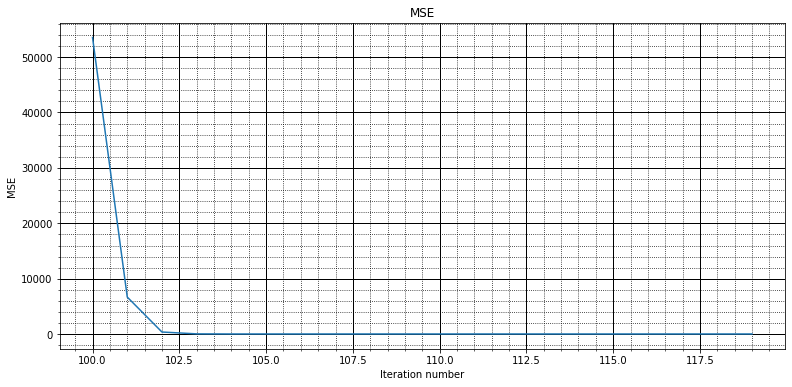

In [24]:
plt.figure(figsize=(13, 6))
plt.plot(plt_x[100:], plt_y[100:])
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.minorticks_on()
plt.grid(which='major',color = 'k', linewidth = 1)
plt.grid(which='minor', color = 'k', linestyle = ':')
plt.grid(True)
plt.show()

#### Путем подбора стало очевидно, что оптимальным решением будет Learning rate = 0.1. По данным и графику видно, что выход на "полку" происходит между 100-й 110-й итерации, а достижение расчетного значения MSE - 43.97 на 110-й.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [25]:
n = X.shape[1]
alpha = 0.1
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(120):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    W[0] -= alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))
    W[1] -= alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))
        
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')


Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.3279203642668515e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159486e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500124e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476035e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283986e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874479e+19
Iteration #90: W_new = [116395.49978363 641638.79866064], MSE = 31317286806394.58
Iteration #100: W_new = [48.41959619 22.99885147], MSE = 53518.86
Iteration #110: W_new = [44.97711111  3.827

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [26]:
n = X.shape[1]
alpha = 0.1
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

i = 0
err = 10e6

while err > 43.97:
    
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    W[0] -= alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))
    W[1] -= alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y)))
           
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

    i +=1

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.3279203642668515e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159486e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500124e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476035e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283986e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874479e+19
Iteration #90: W_new = [116395.49978363 641638.79866064], MSE = 31317286806394.58
Iteration #100: W_new = [48.41959619 22.99885147], MSE = 53518.86
Iteration #110: W_new = [44.97711111  3.827

4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

#### Вывод: уменьшение параметра alpha приводит к увеличению MSE и требует большего количества итераций для выхода на "полку" графика. В свою очередь подбор оптимального значения alpha понижает MSE и также понижает требуемое количество итераций для его достижения.

ДЗ1 Lesson_1_HW

1. Подберите скорость обучения (alpha) и количество итераций

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

Пожалуйста отметьте пройденые курсы в форме https://docs.google.com/forms/d/e/1FAIpQLSeDfmvTwbdQbSiNb0r65wZ3EKK5ex2GBrQGro6zNugbbWcWGA/viewform?usp=sf_link (не важно на платформе GB или ранее)